# Abstract


This project addresses the multi-objective network routing problem, aiming to optimize transmission rates and minimize latency across network nodes. This challenge lies at the intersection of network design and algorithm efficiency, offering a rich area for innovation. The NSGA-II algorithm was implemented from scratch to solve the problem, and a novel approach was introduced by developing a modified variant of the (μ+λ)-PAES algorithm. Unlike the original version, which maintains a constant population size, the modified PAES algorithm allows for retaining as many non-dominated solutions as possible across generations.  

Additionally, two new mutation methods were developed: a modified swap mutation and a latency-reducing mutation, both designed to enhance the quality of solutions. Results indicate that the modified PAES algorithm outperforms NSGA-II in generating a higher number of non-dominated solutions, albeit with a trade-off in computational time. The modifications made to the PAES algorithm, along with the specialized mutations, likely contributed to its success in outperforming NSGA-II in terms of the number of non-dominated solutions. These findings demonstrate the viability of the customized PAES algorithm in achieving superior performance metrics, paving the way for further research into efficient multi-objective optimization strategies.  

# Problem Statement

**Introduction**  

The problem involves optimizing vehicle routing for efficient network communication, a real-world challenge in discrete multi-objective optimization. The objectives to be optimized simultaneously are:  

1. **Maximizing the end-to-end data transmission rate.**  
2. **Minimizing the end-to-end latency.**  

---

 **Decision Variables**  

- The sequence of vehicles (nodes) that form the path from the source vehicle to any of the base stations (BS-1 or BS-2).  
- The transmission rates and latency for each link in the path.  

---

**Objective 1**: Maximize the End-to-End Data Transmission Rate  

Using the table that defines the transmission rate based on the distance between vehicles, the transmission rate for each link is calculated. The end-to-end transmission rate for a path is the minimum transmission rate of its individual links.  

* <img src='https://drive.google.com/uc?id=199KsmACagpzYDvedSfmJUoDKAEu66tvc' width='350'>  

---

**Objective 2**: Minimize the End-to-End Latency  

Each link has a fixed delay of 50 milliseconds. The end-to-end latency is calculated as the sum of the delays for all links in the path.  

* <img src='https://drive.google.com/uc?id=1jIHa6KypeQGdMPhzqDVC_URRqjHFWY92' width='350'>  

---
**Constraints**  

- The distance between two nodes (vehicles or base stations) must not exceed 6000 meters to establish a direct connection.  
- Each path must start at a vehicle and end at a base station.  
- Nodes (vehicles) can serve as relay nodes but cannot be visited more than once in a path to avoid loops.  
- The total number of nodes in a path, including the source vehicle and the base station, must be finite.  

---

**Parameters**  

- Transmission rates are predefined based on the distance between nodes. The table below, provided in the assignment brief, outlines the transmission rate based on the distance between two nodes:  

  * <img src='https://drive.google.com/uc?id=1ToG_4KG1XoI7O50ha1wXzzlKJyO-FfSl' width='400'>  

- Latency is a fixed value per link.  

---

**Assumptions**  

- The network is undirected, meaning a link can operate in either direction (e.g., from Car-4 to Car-5 or from Car-5 to Car-4).  

---

 **Example Demonstration**  

The graph below is a simplified version of the actual network. This example is adapted from the mock assessment.  

* <img src='https://drive.google.com/uc?id=1z8AklbgonaU5FNiJGc4XZYEgXoA7MU1f' width='500'>  

For Car-9, following the green path:  

- **Transmission rate** = min(4, 4, 4, 4, 6) = 4 Mbps  
- **Latency** = 50 X n = 50 X 5 = 250ms

**Project Objectives**  

Based on the outlined problem, the objectives of this project are as follows:  

1. Review potential methods suitable for solving the discrete multi-objective optimization problem.  
2. Identify two methods to address the problem and provide justification for their selection.  
3. Implement the two identified methods.  
4. Generate the routes using the two selected methods.  
5. Evaluate and compare the performance of the two methods using multiple metrics.  
6. Provide recommendations based on the evaluation conducted.  

# Methodology

## Potential Methods

The given problem is a multi-objective optimization problem, directing the focus toward potential methods for solving such problems.  

Multi-objective problems involve the simultaneous optimization of multiple, often conflicting, objectives. The solution to a multi-objective problem is represented as a set of trade-offs, known as the Pareto front, which provides the most balanced compromise between the competing objectives (Deb, 2011).  

Two general approaches are commonly used to address multi-objective optimization problems:  
1. **Classical (Traditional) Methods**  
2. **Evolutionary (Modern) Methods**  

**Classic or Traditional Methods**  

Classical methods for solving multi-objective optimization problems typically involve converting multiple objectives into a single objective using various techniques. The goal is to find a solution that optimally balances all objectives when considered together. According to Gunantara and Ai (2018), Deb (2011), and Xiujuan and Zhongke (2004), the following approaches are commonly used in classical methods:  

1. **Weighted Sum Method**  
   - Each objective is multiplied by a user-defined weight, and the results are summed to form a single scalar objective.  
   - The weights reflect the importance of each objective.  
   - A significant drawback is the need to define weights beforehand, which can be challenging when the relative importance of objectives is uncertain.  

2. **ɛ-constraint Method**  
   - One objective is optimized, while the remaining objectives are converted into constraints with specified thresholds (epsilon).  
   - Varying epsilon values generates different solutions along the Pareto front.  
   - This method requires solving multiple optimization problems and is sensitive to the choice of epsilon values.  

3. **Goal Programming**  
   - The decision-maker specifies a goal for each objective.  
   - The optimization minimizes the deviations from these goals.  
   - This method is particularly useful when the decision-maker has clear preferences or targets for the objectives.  

4. **Lexicographic Method**  
   - Objectives are prioritized in a hierarchical order.  
   - The optimization satisfies the highest-priority objective first, considering the next priority only if multiple solutions exist.  
   - This method is effective when there is a clear hierarchy of importance among objectives.  

5. **Utility Function Method**  
   - A utility function is constructed to reflect the decision-maker's preferences.  
   - The optimization maximizes this utility function, which combines all objectives into a single composite metric.  
   - Designing an appropriate utility function can be complex and subjective.  

**Evolutionary Methods**  

Evolutionary algorithms, a subset of evolutionary computation techniques, are particularly well-suited for multi-objective optimization problems. These methods excel at searching for multiple solutions in parallel, avoiding the need to compromise one objective in favor of another. They inherently handle trade-offs between competing objectives and evolve a set of optimal solutions (a Pareto front) over successive iterations. According to Gunantara and Ai (2018), Deb (2011), and Xiujuan and Zhongke (2004), the following evolutionary algorithms are commonly used for multi-objective optimization:  

1. **Non-dominated Sorting Genetic Algorithm-II (NSGA-II)**  
   - NSGA-II is a widely popular evolutionary algorithm for multi-objective optimization.  
   - It employs mechanisms such as non-dominated sorting and crowding distance to identify and maintain a diverse front of Pareto-optimal solutions.  

2. **Multi-objective Particle Swarm Optimization (MOPSO)**  
   - MOPSO is an adaptation of Particle Swarm Optimization (PSO) for multi-objective problems.  
   - It maintains a repository of the best solutions representing the Pareto front and uses a leader selection mechanism to guide particles toward the Pareto-optimal set.  
   - To apply this method to the problem, particles would need to be represented in binary form (e.g., 0, 1, 0, 1, 1), and the concept of particle movement would involve techniques such as softmax.  

3. **Strength Pareto Evolutionary Algorithm 2 (SPEA2)**  
   - SPEA2 maintains an external population to store non-dominated solutions found during the search.  
   - Its fitness assignment strategy considers both the dominance (strength) and density (distance to the nearest neighbors) of solutions.  

4. **Pareto Archived Evolution Strategy (PAES)**  
   - PAES is an evolutionary strategy that archives non-dominated solutions.  
   - Candidate solutions are compared to archived solutions using Pareto dominance, with decisions based on dominance and diversity.  
   - There are three variants of PAES:  
     - **Basic PAES** ((1+1)-PAES)  
     - **Adaptive Grid PAES** ((1+λ)-PAES)  
     - **Two-Archive PAES** ((μ+λ)-PAES)  

5. **Distance-based Pareto Genetic Algorithm (DPGA)**  
   - DPGA is a variant of the traditional Genetic Algorithm (GA) adapted for multi-objective optimization.  
   - It incorporates Pareto optimality into the GA framework and employs a distance-based approach to maintain population diversity and guide the selection process toward the Pareto-optimal front.  

## Methods used and Justification

Two methods, NSGA-II and PAES, were adopted to address this problem for the following reasons:  

---

**1. Multi-Objective Nature of the Problem**  
- The problem involves optimizing two conflicting objectives: maximizing transmission rate and minimizing latency.  
- Multi-objective evolutionary algorithms, such as NSGA-II and PAES, excel in handling such scenarios.  
- The problem's complex search space with multiple Pareto-optimal solutions makes traditional single-objective optimization methods less effective.  

---

**2. Strengths of NSGA-II**  
- NSGA-II is well-suited for problems with complex Pareto fronts due to its:  
  - **Fast non-dominated sorting approach**: Efficiently ranks solutions based on Pareto dominance.  
  - **Crowding distance mechanism**: Maintains diversity in the solution population.  
- It is known for efficiently converging toward the true Pareto front, making it ideal for finding a diverse set of high-quality solutions.  
- NSGA-II incorporates elitism, ensuring that the best solutions from each generation are carried forward to the next, enhancing the algorithm's capability to find optimal solutions over iterations.  

---

**3. Strengths of PAES**  
- The (μ+λ)-PAES variant, modified for this problem, is particularly effective in maintaining diversity within the solution set and avoiding premature convergence.  
- PAES is well-suited for exploring trade-offs between the conflicting objectives of maximizing transmission rate and minimizing latency.  
- Its local search capability allows for thorough exploration of the solution space, especially beneficial for problems with numerous optimal paths for a given node (car).  

---

**4. Complementarity of Both Algorithms**  
- NSGA-II offers robust global search capabilities, while PAES provides effective local search.  
- Together, they complement each other, ensuring a comprehensive exploration of the solution space.  

---

**5. Discrete Nature of the Problem**  
- The discrete nature of the problem aligns well with the strengths of both NSGA-II and PAES, which are designed to handle discrete optimization problems effectively.  

## Loading of Data

### Import Libraries

All necessary libraries required for the project are imported in this section.

In [ ]:
import pandas as pd
import random
from random import shuffle, choice, sample
import matplotlib.pyplot as plt
import math
from itertools import combinations
from copy import deepcopy
import json
import re
import numpy as np
import time
import pandas as pd
from IPython.display import display, HTML
from tabulate import tabulate
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
from tqdm import tqdm

### Transform data to Coordinates


- The data has been securely uploaded to Dropbox (original version without headers), eliminating the need to upload the file here.  
- A function is created to read the coordinates from the uploaded Excel file.  
- Finally, the base station coordinates are appended to the existing coordinates.  

In [ ]:
## Function to read coordinates from excel file
def read_coordinates_from_excel(url):
    # Read the Excel file into a pandas DataFrame
    df = pd.read_csv(url, header=None)

    # Assign column names for easier reference
    df.columns = ['ID', 'X', 'Y']

    # Extract the coordinates columns
    coordinates = df[['X', 'Y']].values.tolist()  # Assuming the columns are labeled 'x' and 'y'
    return coordinates

# URL to the Excel file on Dropbox
file_url = 'https://www.dropbox.com/scl/fi/82uf6jo5vpll8wpu56wgm/data_file.csv?rlkey=f59rgv0ksv3ug8puwtmzrbeoa&dl=1'  # Make sure to have the 'dl=1' parameter for direct download
coordinates = read_coordinates_from_excel(file_url)

# Append the base station coordinates
coordinates.append((-1, -1))  # Coordinates for BS-1
coordinates.append((56325, 9))  # Coordinates for BS-2


### Network class

- A method was created to calculate the transmission rate based on the distance between nodes.  
- A function for calculating the distance between two points was implemented.  
- A function was developed to create a network link between two nodes, provided the distance between them is not zero. Each link was added to a list called **`Network_links_list`**, which stores all the available links in the network.  
- Finally, the network was visualized.  

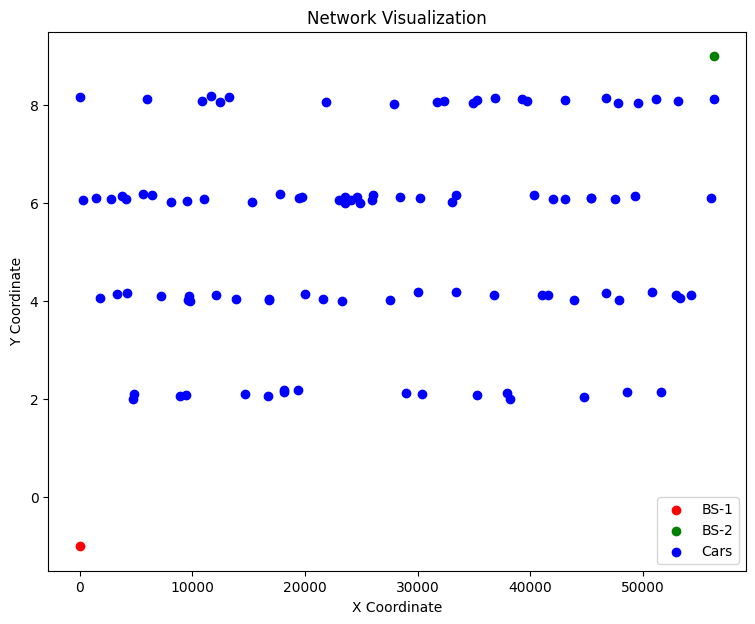

In [ ]:
## Creating a class for the Network links
class NetworkLink():

    def __init__(self, start_node, end_node, distance, transmission_rate):
        self.start_node = start_node
        self.end_node = end_node
        self.distance = distance
        self.transmission_rate = transmission_rate
        self.latency = 50

    @staticmethod #calculate_transmission_rate was created as a static method just incase we need it later
    def calculate_transmission_rate(distance):
        if distance >= 6000:
            return 0
        elif 6000 > distance >= 4000:
            return 1
        elif 4000 > distance >= 3000:
            return 2
        elif 3000 > distance >= 2000:
            return 4
        elif 2000 > distance >= 1000:
            return 6
        elif 1000 > distance >= 500:
            return 8
        else:
            return 10


# Function to calculate distance between two points
def calculate_distance(point1, point2):
    return math.sqrt((point2[0] - point1[0]) ** 2 + (point2[1] - point1[1]) ** 2)

# Function to create network links
def create_network_links(coordinates):
    network_links_list = []
    for i in range(len(coordinates)):
        for j in range(i+1, len(coordinates)):
            distance = calculate_distance(coordinates[i], coordinates[j])
            transmission_rate = NetworkLink.calculate_transmission_rate(distance)
            if transmission_rate > 0:
                start_node = 'Car-' + str(i+1) if i < len(coordinates) - 2 else 'BS-1' if i == len(coordinates) - 2 else 'BS-2'
                end_node = 'Car-' + str(j+1) if j < len(coordinates) - 2 else 'BS-1' if j == len(coordinates) - 2 else 'BS-2'
                network_links_list.append(NetworkLink(start_node, end_node, distance, transmission_rate))
    return network_links_list

## function to Visualize the network
def visualize_network(coordinates, network_links_list):

    # Visualize the network
    plt.figure(figsize=(9, 7))
    # Plot the base stations
    plt.scatter(-1, -1, color='red', label='BS-1')
    plt.scatter(56325, 9, color='green', label='BS-2')

    # Plot the cars
    car_coords = coordinates[:-2]  # Exclude base stations
    xs, ys = zip(*car_coords)
    plt.scatter(xs, ys, color='blue', label='Cars')

    # # Draw the links
    # for link in network_links_list:
    #     # Find the indices in the coordinates list for start and end nodes
    #     start_idx = int(link.start_node.split('-')[1]) - 1
    #     end_idx = int(link.end_node.split('-')[1]) - 1
    #     plt.plot([coordinates[start_idx][0], coordinates[end_idx][0]],
    #              [coordinates[start_idx][1], coordinates[end_idx][1]], 'k-') #([x1, x2], [y1,y2])

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.title('Network Visualization')
    plt.show()


## Create Network_links_list
network_links_list = create_network_links(coordinates)

## Visualize the network
visualize_network(coordinates, network_links_list)



Testing to be sure everything is fine

In [ ]:
## Checking the length of network_link_list

len(network_links_list)

988

In [ ]:
## Randomly checking links

((network_links_list[0].start_node,
 network_links_list[0].end_node,
 network_links_list[0].transmission_rate),

(network_links_list[1].start_node,
network_links_list[1].end_node,
network_links_list[1].transmission_rate))

(('Car-1', 'Car-2', 6), ('Car-1', 'Car-3', 2))

In [ ]:
## Randomly checking links

((network_links_list[986].start_node,
 network_links_list[986].end_node,
 network_links_list[986].transmission_rate),

(network_links_list[987].start_node,
network_links_list[987].end_node,
network_links_list[987].transmission_rate))

(('Car-99', 'BS-2', 10), ('Car-100', 'BS-2', 10))

## GENETIC ALGORITHM

### Explanation

The NSGA-II algorithm was implemented from scratch to address this problem.

Before detailing the steps of the Non-dominated Sorting Genetic Algorithm (NSGA-II), the following concepts are explained to provide clarity on the approach:

---

**Dominance**  
In multi-objective optimization, solutions are compared based on dominance.  

A solution \( x_1 \) is said to dominate a solution \( x_2 \) if:  
- \( x_1 \) is better than \( x_2 \) in at least one objective, and  
- \( x_1 \) is no worse than \( x_2 \) in all objectives.  

**Example**:  
If a solution \( x_1 \) has a transmission rate of 6 Mbps and a latency score of 50 ms, while solution \( x_2 \) has a transmission rate of 4 Mbps and a latency score of 100 ms, then \( x_1 \) dominates \( x_2 \). This is because \( x_1 \) has both a better transmission rate and latency than \( x_2 \).  

---

**Pareto Fronts**  
If a solution \( x_1 \) dominates \( x_2 \) in one objective and \( x_2 \) dominates \( x_1 \) in another, both solutions are considered to belong to the same Pareto front.  

In a solution set, multiple Pareto fronts may exist, typically grouped as Pareto front 1, Pareto front 2, Pareto front 3, and so on.  

**Example**:  
If \( x_1 \) has a transmission rate of 4 Mbps and a latency score of 200 ms, and \( x_2 \) has a transmission rate of 2 Mbps and a latency score of 50 ms, \( x_1 \) and \( x_2 \) belong to the same Pareto front. This is because \( x_1 \) has a better transmission rate, while \( x_2 \) has a better latency.  

---

**Non-dominated Solution Set**  
Given a set of solutions, the non-dominated solution set consists of all solutions that are not dominated by any other solution in the set.  

---

**Graphical Representation**  

Consider \( f_1 \) as the transmission rate and \( f_2 \) as the latency in the diagram below:  

<img src='https://drive.google.com/uc?id=1dC49GIbJ7fsM7c54wOjPFOiVCjXrQ0gl' width='500'>  

- Solution 3 dominates solutions 1, 4, and 2. Additionally, solution 4 dominates solution 2.  
- Solutions 1 and 4 belong to Pareto front 2 (\( F_2 \)). Solutions 3 and 5 belong to Pareto front 1 (\( F_1 \)). Solution 2 belongs to Pareto front 3 (\( F_3 \)).  
- Solutions 3 and 5 constitute the non-dominated solution set.  

**Steps for the NSGA-II Adopted**  

The steps for the NSGA-II algorithm are based on the explanation by Deb et al. (2002).  

<img src='https://drive.google.com/uc?id=1XddOiMVYmovhzr-pp4tZhi6CpDNwhdWr' width='600'>  

---

**Breakdown of the Steps and Their Implementation**  

**1. Step 1: Randomly Generate the First Generation of Size N**  
- A function called **`create_feasible_solution`** was created to ensure that randomly generated solutions fall within the feasible solution space.  
- The method attempts to create a route from a starting node to one of the base stations ('BS'), represented as a path in the network. The process is as follows:  

  1. **Initialize the Route**: Start with an empty route and a list of visited nodes, beginning with the starting node.  
  2. **Extend the Route**: Continuously extend the route from the current node until a base station is reached, or terminate the process if it takes too long.  
  3. **Check Feasible Links**: At each step, identify links that can extend the route without revisiting nodes already in `used_nodes`.  
  4. **Handle Dead Ends with Backtracking**: If no extension is possible, backtrack one step (remove the last link and node) and try an alternative path. If backtracking is not possible (no previous steps), terminate and return `None`.  
  5. **Choose the Next Link and Update the Route**: If feasible next steps exist, select the first one, add it to the route, and mark the link as part of the solution.  
  6. **Terminate on Reaching a Base Station**: Once a base station is reached, return the chromosome and the routing path (`used_nodes`) that form the route.  

---

**2. Step 2: Calculate the Objective Functions for the First Generation**  
- A function named **`calculate_fitness`** was implemented to compute the transmission rate and latency for individuals in the population. The computed values are stored in a dictionary. The process is as follows:  

  1. **Initialize Fitness Metrics**: Start with the highest possible transmission rate and zero latency.  
  2. **Traverse the Chromosome**: Loop through the chromosome of the individual to identify which links are part of the solution (1 indicates the link is part of the routing path, 0 indicates it is not).  
  3. **Update Transmission Rate**: For each link in the solution, update the transmission rate to the lowest rate found in the path.  
  4. **Count the Links**: Track the number of links in the solution to calculate total latency.  
  5. **Calculate Total Latency**: Multiply the number of links by 50 to compute total latency.  

---  


**3. Step 3: Sort the Population into Fronts Using the Non-Dominated Sorting Algorithm**  

This step involves sorting the individuals in the population into different fronts or levels F1, F2, F3, F4 , etc., based on their dominance levels. F1 represents the best level, F2 the next best, and so on.  

<img src='https://drive.google.com/uc?id=1vpW5HHyl4kyWicrtux_B7VfCGPy7AW3m' width='500'>  

The image below, adapted from Seshadri (2006), explains the fast non-dominated sorting algorithm used to categorize the population into different fronts.  

<img src='https://drive.google.com/uc?id=1YdGaaFKoONg8mB0ICWUtlA-BTS5osd8K' width='700'>  

To implement this, the function **`fast_non_dominated_sort`** was created. Below is a brief explanation of the steps involved:  

1. **Initialize Fronts**: Start with an empty list to hold the first front of non-dominated solutions.  
2. **Assign Domination**: For each solution in the population, count how many other solutions dominate it and record which solutions it dominates.  
3. **Identify the First Front**: Solutions with a domination count of 0 (meaning no solution dominates them) are assigned the highest rank F1 and placed in the first front.  
4. **Form Subsequent Fronts**: For each solution in the current front, iteratively reduce the domination count of the solutions it dominates. Solutions whose domination count is reduced to zero are assigned to the next front.  
5. **Repeat**: Continue this process until all solutions are assigned to fronts, and no more solutions remain to be sorted.  

---

**4. Step 4: Use Binary Tournament Selection for Parents in the Current Population**  

To implement this step, the **`tournament_selection`** method was created. This algorithm randomly selects two individuals from the population and chooses one as a parent based on their rank. If the rank alone is not sufficient to determine the selection, the crowding distance is used as a secondary criterion.  

---

**Explanation of Crowding Distance**  

The crowding distance measures the density of solutions surrounding a given individual within the same Pareto front. It helps determine which solution is better among individuals in the same front.  

**Illustration**:  

<img src='https://drive.google.com/uc?id=1A0zW4wf5J27CeQTaaqowwT-eqYZghRKD' width='500'>  

In the illustration, both the blue and red solutions belong to the same Pareto front. To determine which solution is better, the crowding distance is employed. The blue solution is in a less crowded region, while the red solution is in a more crowded region. Therefore, the blue solution has a higher crowding distance and is more likely to be selected.  

The following image, adapted from Seshadri (2006), explains how crowding distance is calculated:  

<img src='https://drive.google.com/uc?id=16xg0TuNusL67FEiE8aA3eXIpdgnARdWa' width='700'>  

---

**Implementation of Crowding Distance Assignment**  

To compute crowding distances, the **`crowding_distance_assignment`** method was implemented as part of the genetic algorithm class. Below are the steps:  

1. **Input the Front**: The method takes a Pareto front obtained from the fast non-dominated sorting algorithm. If the front has one or fewer individuals, an infinite crowding distance is assigned to ensure selection.  
2. **Initialize Crowding Distance**: Set the crowding distance to zero for each individual in the front.  
3. **Sort by Objective Values**: For each objective (transmission rate and latency):  
   - Sort the front based on the objective values.  
   - For **transmission rate**, sort from lowest to highest value.  
   - For **latency**, sort from highest to lowest value, as lower latency is more desirable.  
4. **Assign Infinite Distance to Extremes**: Assign infinite crowding distances to the extreme individuals in the sorted list to preserve diversity.  
5. **Update Crowding Distance**: For all other individuals, calculate the crowding distance based on the normalized difference in objective values with their neighbors.  
6. **Return Updated Front**: The method returns the front with updated crowding distances, indicating the density of neighboring solutions for each individual.

---


**5. Step 5: Perform Crossover and Mutation to Generate the Offspring Population of Size \( N \)**  

---

**Crossover Method Used**  

According to Puljić and Manger (2013), eight crossover methods are suitable for vehicle routing problems: order crossover, partially mapped crossover, edge recombination crossover, cycle crossover, alternating edges crossover, heuristic greedy crossover, random crossover, and probabilistic crossover.  

The **Edge Recombination Crossover (ERC)** was selected for this problem because it preserves edges and utilizes as many parent edges as possible. This preservation is essential to avoid generating infeasible solutions after crossover.  

**Example of ERC Process**  

Given two parent routes:  
- **Parent 1 (x1):** ( Car-9, Car-5, Car-4, Car-2, BS-1 )  
- **Parent 2 (x2):** ( Car-9, Car-8, Car-5, Car-1, Car-2, BS-1)  

Steps:  
1. **Generate Neighbor Lists**: For each node, combine neighbors from both parents.  
   - For example, Car-9's neighbors are Car-5 and Car-8.  

2. **Select the First Node**: Choose the starting node from a random parent (e.g., Car-9 from Parent 1).  

3. **Choose the Next Node**: From Car-9's neighbors (Car-5 and Car-8), select the one with the fewest unvisited neighbors. If both have equal neighbors, choose randomly (e.g., Car-5).  

4. **Update Neighbor Lists**: Remove Car-9 from all neighbor lists and proceed with Car-5.  

5. **Continue the Process**:  
   - Select the next node (e.g., Car-8) with the fewest unvisited neighbors.  
   - If no valid neighbors exist, backtrack, remove invalid nodes, and continue.  

6. **Complete the Path**:  
   - Continue selecting nodes and removing visited ones until a complete path is formed.  
   - Example resulting path: ( Car-9, Car-5, Car-4, Car-1, Car-2, BS-1 ).  

This method was implemented as the **`crossover`** function of the individual class. The tutorial on [Rubicite](https://www.rubicite.com/Tutorials/GeneticAlgorithms/CrossoverOperators/EdgeRecombinationCrossoverOperator.aspx) was instrumental in understanding and implementing the ERC algorithm.  

---

**Mutation Method Used**  

Puljić and Manger (2013) identify three types of mutations suitable for vehicle routing problems: inversion mutation, scramble mutation, and swap mutation.  

**Inversion Mutation** was selected due to its simplicity and edge-preserving nature, ensuring the resulting offspring remains feasible.  

**Example of Inversion Mutation**  

Given the child route:  
( Car-9, Car-5, Car-4, Car-1, Car-2, BS-1 )  

1. Select a segment (e.g., Car-4 to Car-2).  
2. Invert the segment:  
   ( Car-9, Car-5, Car-2, Car-1, Car-4, BS-1 ).  

To preserve feasibility, ensure edges (e.g., Car-5 to Car-2 and Car-4 to BS-1) exist before performing inversion.  

---

 **Implementation of the Mutation Method**  

The **`mutate`** function operates as follows:  
1. Determine if mutation occurs, based on a randomly generated number and the mutation rate.  
2. Identify valid segments within the route that can be inverted. Segments are valid if their endpoints can reconnect after inversion.  
3. Randomize the list of valid segments to avoid deterministic behavior.  
4. Select the first valid segment and invert its nodes.  
5. Update the chromosome to reflect the new route after inversion.  

---


**6. Step 6:** Calculate the objective functions for the offspring population.  

**7. Step 7:** Combine the offspring and parent populations to form a population of size \( 2N \).  

**8. Step 8:** Perform non-dominated sorting on the combined population.  

**9. Step 9:** Create the next generation by selecting the \( N \) best individuals from the sorted population (Elitism).  
- Selection criteria:  
  - Select individuals from the best fronts sequentially.  
  - If adding the next front exceeds the population size \( N \), use the crowding distance to decide which individuals from that front are included.  
  - This process is illustrated in the image below from Deb et al. (2002):  

  <img src='https://drive.google.com/uc?id=1TUbh7E2AX9f06qR-_NIfcUI9K_dKrNtj' width='500'>  

**10. Step 10:** Terminate the algorithm upon reaching the specified number of generations.  

---


**Other Methods Used in the Genetic Algorithm**  

The additional methods implemented in this algorithm are straightforward and can be understood through the code comments. Below is a summary of these methods:  

---

**1. `dominates` Method**  
- Compares two solutions to determine which one dominates the other.  
- This method is utilized in the **`fast_non_dominated_sort`** function.  

---

**2. `is_link_present` Method**  
- Determines whether a link exists between two selected nodes.  

---

**3. `collect_all_routes` Method**  
- Collects all routes for all nodes (e.g., Car-1 to Car-100) and outputs the data in JSON format.  

---

**Attributes of the `Individual` Class**  

1. **`self.algorithm`**:  
   - Indicates the optimization algorithm associated with the individual.  
   - "GA" refers to Genetic Algorithm, while "PA" refers to PAES.  

2. **`self.network_links`**:  
   - A list of potential network links available for inclusion in the individual's routing path.  

3. **`self.start_node`**:  
   - Represents the starting node for the individual's routing path.  

4. **`self.end_nodes`**:  
   - A tuple containing possible end nodes for the routing path, typically base stations.  
   - Although this attribute was not utilized as originally intended.  

5. **`self.generation`**:  
   - Tracks the generation number to which the individual belongs.  

6. **`self.chromosome`**:  
   - A binary list of 0's and 1's representing the presence or absence of links in the individual's routing path.  

7. **`self.used_nodes`**:  
   - A list of nodes actively used in the individual's routing path.  

8. **`self.fitness_scores`**:  
   - A dictionary storing the individual's fitness scores for different objectives, such as transmission rate and latency.  

9. **`self.rank`**:  
   - Indicates the individual's rank as determined by the **`fast_non_dominated_sort`** algorithm.  

10. **`self.domination_count`**:  
    - Tracks the number of individuals by which this individual is dominated.  

11. **`self.dominated_solutions`**:  
    - A set of individuals that this individual dominates.  

12. **`self.crowding_distance`**:  
    - Holds the crowding distance value of the individual, reflecting the density of neighboring solutions.  

---


### Individual class

In [ ]:
class Individual():
    def __init__(self, network_links, start_node, end_nodes=('BS-1', 'BS-2'), generation=0, create_new=True):
        self.algorithm = 'GA'
        self.network_links = network_links
        self.start_node = start_node
        self.end_nodes = end_nodes
        self.generation = generation

        # This  if else line was added to ensure we don't just call the create_feasible_solution
        # anytime we want to do crossover, we only want to call create_feasible_solution
        # only when we initialize a population. This would help in reducing the computational time
        if create_new:
            self.chromosome, self.used_nodes = self.create_feasible_solution()
            if self.chromosome is None:  # Meaning it Failed to create a feasible solution
                raise ValueError("Failed to create a feasible initial solution.")
        else:
            self.chromosome = [0] * len(self.network_links)
            self.used_nodes = [start_node]

        self.fitness_scores = {
            'transmission_rate': 0,
            'latency': 0
        }
        self.calculate_fitness()
        self.rank = None
        self.domination_count = None
        self.dominated_solutions = None
        self.crowding_distance = 0

    def create_feasible_solution(self, max_attempts=100):
        path = []  # Holds NetworkLink objects representing the path
        chromosome = [0] * len(self.network_links)
        used_nodes = [self.start_node]

        attempts = 0
        while not used_nodes[-1].startswith('BS'):  # Use the last node in used_nodes as the current node. Stop the while loop when we get to a base station
            if attempts > max_attempts:
                return None, None  # Return None if too many attempts without success, and it ensures we don't get stuck in the while loop

            # Here we are trying to get as many links that are directly connected to the current last node in used_path
            possible_links = [link for link in self.network_links if
                              (link.start_node == used_nodes[-1] and link.end_node not in used_nodes) or
                              (link.end_node == used_nodes[-1] and link.start_node not in used_nodes)]
            shuffle(possible_links)  # Shuffle to add randomness

            # Backtrack if there are no possible links to move to
            if not possible_links:
                if path:  # Check if there is a link to backtrack
                    last_link = path.pop()
                    link_index = self.network_links.index(last_link)
                    chromosome[link_index] = 0
                    used_nodes.pop()  # Remove the last node from used_nodes
                else:
                    return None, None  # No path found

            # If there are possible links, then pick the first as the next link
            else:
                next_link = possible_links[0]
                path.append(next_link)
                link_index = self.network_links.index(next_link)
                chromosome[link_index] = 1
                # Append either the start_node or end_node of next_link depedning on the one that isn't in used_nodes
                next_node = next_link.end_node if next_link.start_node == used_nodes[-1] else next_link.start_node
                used_nodes.append(next_node)

            attempts += 1

        return chromosome, used_nodes

    def calculate_fitness(self):
        # Initialize the fitness scores
        self.fitness_scores['transmission_rate'] = float('inf')
        self.fitness_scores['latency'] = 0

        # Calculate the transmission rate and latency
        link_count = 0
        for i, gene in enumerate(self.chromosome):
            if gene == 1:
                link = self.network_links[i]
                # Fitness is the minimum transmission rate in the path
                self.fitness_scores['transmission_rate'] = min(self.fitness_scores['transmission_rate'], link.transmission_rate)
                # Increase the link count
                link_count += 1

        # Calculate the total latency
        self.fitness_scores['latency'] = link_count * 50

        # If no links are used, set the transmission rate to 0 and latency to a high value
        if self.fitness_scores['transmission_rate'] == float('inf'):
            self.fitness_scores['transmission_rate'] = 0
            self.fitness_scores['latency'] = float('inf')

    def crossover(self, other_individual):
        # Create the adjacency list (neighbour list) for all nodes from both parents
        adjacency_list = {}
        for individual in [self, other_individual]:
            for i in range(len(individual.used_nodes) - 1): # stop b4 node BS, bcos no need to get its neighbour
                node1 = individual.used_nodes[i]
                node2 = individual.used_nodes[i + 1]
                if node1 not in adjacency_list:
                    adjacency_list[node1] = set()
                if node2 not in adjacency_list:
                    adjacency_list[node2] = set()

                # Add elements that appear before and after node i
                adjacency_list[node1].add(node2)
                adjacency_list[node2].add(node1)

        # Initialize the offspring with the start node
        current_node = self.start_node
        offspring_path = [current_node]
        visited_nodes = {current_node}  # Set to keep track of visited nodes

        # Ensuring the start node is in the adjacency list before proceeding
        if current_node not in adjacency_list:
            return None

        # Build the offspring path
        while not current_node.startswith('BS'):

            neighbors = list(adjacency_list[current_node] - visited_nodes)  # Subtract visited nodes from neighbors
            if not neighbors:
                # If no neighbors are available for the next move, return None
                return None

            neighbors.sort(key=lambda x: len(adjacency_list[x] - visited_nodes))  # Sort in increasing neighbourlist based on remaining neighbors
            next_node = neighbors[0] # the one with the least neighbour becomes the next node

            # Add the chosen node to the offspring path
            offspring_path.append(next_node)
            visited_nodes.add(next_node)  # Add to visited nodes

            # Update the current node to continue building the path
            current_node = next_node

        # Translate the path into a chromosome
        offspring_chromosome = [0] * len(self.network_links)
        for i in range(1, len(offspring_path)): # start from the second element in offspring_path
            for link in self.network_links:
                if (link.start_node == offspring_path[i - 1] and link.end_node == offspring_path[i]) or \
                   (link.end_node == offspring_path[i - 1] and link.start_node == offspring_path[i]) :
                    offspring_chromosome[self.network_links.index(link)] = 1
                    break # Break the search in 2nd for loop, cos we have found the link, then go to next iteration of the 1st loop

        # Create the offspring individual with incremented generation
        offspring = Individual(self.network_links, self.start_node, self.end_nodes, self.generation + 1, create_new=False)
        offspring.chromosome = offspring_chromosome
        offspring.used_nodes = offspring_path
        offspring.calculate_fitness()  # Calculate the fitness of the offspring
        return offspring

    # This method is employed in the mutate method
    # It checks if there is a link between two nodes based on links in self.network_links
    def is_link_present(self, node_a, node_b):
        return any(link.start_node == node_a and link.end_node == node_b or
                   link.start_node == node_b and link.end_node == node_a for link in self.network_links)


    def mutate(self, mutation_rate):
        if random.random() < mutation_rate:
            # Generate a list of valid segments for inversion in used_nodes
            valid_segments = []
            for i in range(1, len(self.used_nodes) - 3):  # Skip the starting node and end 3 nodes b4 the last node(BS)
                for j in range(i + 2, len(self.used_nodes) - 1):  #start from 2 nodes after i and end ensure at least a segment of size 2
                    # Check if (nodes i-1 and j), and (nodes i and j+1) are connected
                    if self.is_link_present(self.used_nodes[i-1], self.used_nodes[j]) and \
                       self.is_link_present(self.used_nodes[i], self.used_nodes[j+1]):
                        valid_segments.append((i, j))

            # Shuffle the list of valid segments To add randomness
            random.shuffle(valid_segments)

            # Perform mutation inversion on the first valid segment found
            if valid_segments:
                start, end = valid_segments[0]
                # Invert the segment in used_nodes
                self.used_nodes[start:end+1] = self.used_nodes[start:end+1][::-1]

                # Reflect this inversion in the chromosome
                # Reset the chromosome
                self.chromosome = [0] * len(self.network_links)
                # Rebuild the chromosome based on the modified used_nodes path
                for i in range(1, len(self.used_nodes)): # start from the second element in used_nodes
                    for link in self.network_links:
                        if (link.start_node == self.used_nodes[i - 1] and link.end_node == self.used_nodes[i]) or \
                           (link.end_node == self.used_nodes[i - 1] and link.start_node == self.used_nodes[i]) :
                            self.chromosome[self.network_links.index(link)] = 1
                            break # Break the search in 2nd for loop, cos we have found the link, then go to next iteration of the 1st loop

        return self  # This will always return the individual whether it's mutated or not


    def dominates(self, other_individual):
        # For transmission_rate, a higher value is better (maximize)
        better_transmission_rate = self.fitness_scores['transmission_rate'] > other_individual.fitness_scores['transmission_rate']
        # For latency, a lower value is better (minimize)
        better_latency = self.fitness_scores['latency'] < other_individual.fitness_scores['latency']

        # Individual1 dominates Individual2 if it is no worse in all objectives and better in at least one
        no_worse_in_all = (self.fitness_scores['transmission_rate'] >= other_individual.fitness_scores['transmission_rate']) and \
                          (self.fitness_scores['latency'] <= other_individual.fitness_scores['latency'])

        # Individual1 is better than Individual2 in at least one objective
        better_in_at_least_one = better_transmission_rate or better_latency

        return no_worse_in_all and better_in_at_least_one # returns a boolean



### Genetic Algorithm class

In [ ]:
class GeneticAlgorithm():
    def __init__(self, population_size, network_links, start_node, end_nodes=('BS-1', 'BS-2')):
        self.population_size = population_size
        self.population = []
        self.generation = 0
        self.best_solution = None # not needed
        self.list_of_solutions = [] # not needed
        self.network_links = network_links
        self.start_node = start_node
        self.end_nodes = end_nodes # not needed
        self.generational_pareto_fronts = [] # holds the first pareto front of each generation

    def initialize_population(self):
        while len(self.population) < self.population_size: # continue to call create_feasible_solution until we have the number of population needed
            try:
                individual = Individual(self.network_links, self.start_node, self.end_nodes, generation=0, create_new=True)
                self.population.append(individual)
            except ValueError:
                # If an individual with a feasible solution cannot be created, try again
                continue
        self.best_solution = self.population[0]

    def fast_non_dominated_sort(self, population):
        fronts = [[]]
        for p in population:
            p.domination_count = 0
            p.dominated_solutions = set()
            for q in population:
                if p.dominates(q):
                    p.dominated_solutions.add(q)
                elif q.dominates(p):
                    p.domination_count += 1
            if p.domination_count == 0:
                p.rank = 1
                fronts[0].append(p)

        i = 0
        while fronts[i]:
            Q = []
            for p in fronts[i]:
                for q in p.dominated_solutions:
                    q.domination_count -= 1
                    if q.domination_count == 0:
                        q.rank = i + 2
                        Q.append(q)
            i += 1
            fronts.append(Q)

        return fronts[:-1]  # The last front will be empty

    def crowding_distance_assignment(self, front):
        # No need to calculate crowding distance if front is empty or has only one individual
        if len(front) <= 1:
            for individual in front:
                individual.crowding_distance = float('inf')  # Assign infinity to make sure it gets selected
            return front

        # Initialize crowding distance for each individual
        for individual in front:
            individual.crowding_distance = 0

        # We have two objectives: transmission_rate (maximize), latency (minimize)
        objectives = ['transmission_rate', 'latency']
        for obj in objectives:
            # Sort individuals based on the objective
            # For transmission_rate we do not reverse the sort order (higher is better)
            # For latency we reverse the sort order (lower is better)
            front.sort(key=lambda x: x.fitness_scores[obj], reverse=(obj == 'latency'))

            # Assign infinity distance to boundary values
            front[0].crowding_distance = float('inf')
            front[-1].crowding_distance = float('inf')

            # Find the range of the objective
            min_value = front[0].fitness_scores[obj]
            max_value = front[-1].fitness_scores[obj]
            range_of_objective = max_value - min_value

            # Calculate crowding distance only if there is a range (i.e., not all values are equal)
            if range_of_objective != 0:
                for k in range(1, len(front) - 1):
                    front[k].crowding_distance += (front[k + 1].fitness_scores[obj] - front[k - 1].fitness_scores[obj]) / range_of_objective

        return front

    def tournament_selection(self, k=2):
        selected_parents = []
        while len(selected_parents) < self.population_size:
            participants = random.sample(self.population, k)
            participants.sort(key=lambda ind: (ind.rank, -ind.crowding_distance))
            selected_parents.append(participants[0])
        return selected_parents

    def select_next_generation(self, children):
        # Combine the existing population with the children
        combined_population = self.population + children

        # Perform fast non-dominated sorting on the combined population
        fronts = self.fast_non_dominated_sort(combined_population)

        # Calculate crowding distance for each front
        for front in fronts:
            self.crowding_distance_assignment(front)

        # Select the next generation from the sorted fronts
        new_population = []
        front_index = 0
        while len(new_population) + len(fronts[front_index]) <= self.population_size:
            # Add the entire front to the new population if it fits
            new_population.extend(fronts[front_index])
            front_index += 1

        # If the last front to consider is too large to fit in the remaining slots,
        # sort the front by crowding distance and take as many individuals as needed
        if len(new_population) < self.population_size:
            sorted_front = sorted(fronts[front_index], key=lambda ind: ind.crowding_distance, reverse=True) # sorted in decreasing order
            new_population.extend(sorted_front[:self.population_size - len(new_population)]) # extend population to the required size

        return new_population


    def solve(self, mutation_probability, number_of_generations):
        self.initialize_population()

        for generation in range(number_of_generations):

            # Rank the population using fast non-dominated sort
            fronts = self.fast_non_dominated_sort(self.population)

            # Calculate crowding distance for each individual in each front
            for front in fronts:
                self.crowding_distance_assignment(front)

            # Selection process based on rank and crowding distance
            parents = self.tournament_selection()

            # Create the offspring population through crossover and mutation
            children = []
            while len(children) < self.population_size:
                parent1, parent2 = random.sample(parents, 2)
                child = parent1.crossover(parent2)
                if child is not None:  # Ensuring the child is valid
                    child.mutate(mutation_probability)
                    children.append(child)

            # Combine parent and child populations and select the best to form new population
            self.population = self.select_next_generation(children)

            # Evaluate the objective functions for each individual in the new population
            # This step is necessary to have fitness values for the next iteration
            for individual in self.population:
                individual.calculate_fitness()

            # Collect individuals in the first Pareto front for this generation
            current_pareto_front = [ind for ind in self.population if ind.rank == 1]
            self.generational_pareto_fronts.append(current_pareto_front)


        # After all generations, sort the final population and report the first Pareto front
        final_fronts = self.fast_non_dominated_sort(self.population)

        # Create a set to store unique chromosomes (we are trying to ensure the solutions we collect are not repetitive, we want unique solutions)
        unique_chromosomes = set()
        unique_first_pareto_front = []

        if final_fronts:
            for individual in final_fronts[0]:
                # Convert the chromosome to a string to store in a set for uniqueness check
                chromosome_str = str(individual.chromosome)
                if chromosome_str not in unique_chromosomes:
                    unique_first_pareto_front.append(individual)
                    unique_chromosomes.add(chromosome_str)

        # Return the unique first Pareto front, their fitness scores, and the first pareto fronts for the generations
        return unique_first_pareto_front, [individual.fitness_scores for individual in unique_first_pareto_front], self.generational_pareto_fronts

    def collect_all_routes(self):
        all_routes = {}

        for car_index in tqdm(range(1, 101), desc='Collecting routes'):
            start_node = f"Car-{car_index}"
            self.start_node = start_node  # Update start node for each run
            self.population = []  # Reset population for each run
            pareto_front, x, y = self.solve(mutation_probability, number_of_generations)

            # Initialize the dictionary for the current start node only once
            all_routes[start_node] = {}

            # Collect detailed routing paths for each solution
            for ind_index, individual in enumerate(pareto_front):
                route_details = {
                    "Routing Path": '',
                    "End-to-end data rate": individual.fitness_scores['transmission_rate'],
                    "Latency": individual.fitness_scores['latency']
                }

                # Manually construct the routing path string
                routing_path_list = []
                for i in range(len(individual.used_nodes) - 1):
                    node = individual.used_nodes[i]
                    next_node = individual.used_nodes[i+1]
                    for link in self.network_links:
                        if (link.start_node == node and link.end_node == next_node) or \
                          (link.start_node == next_node and link.end_node == node):
                            routing_path_list.append(f"({node})")
                            routing_path_list.append(f"{link.transmission_rate}")
                            break
                # Add the last node which is the base station
                routing_path_list.append(f"({individual.used_nodes[-1]})")
                route_details["Routing Path"] = ", ".join(routing_path_list)

                # Add this route to the all_routes dictionary under the appropriate solution key
                node_solution_key = f"Solution {ind_index + 1}"
                all_routes[start_node][node_solution_key] = route_details

        # Return all routes
        return all_routes

### Testing the NSGA-II algorithm

In [ ]:
# Parameters for the NSGA-II algorithm
population_size = 20
mutation_probability = 0.1
number_of_generations = 100
start_node = 'Car-50'

# Initialize and run the NSGA-II algorithm
ga = GeneticAlgorithm(population_size, network_links_list, start_node)
first_pareto_front, x, y = ga.solve(mutation_probability, number_of_generations)
for individual in first_pareto_front:
    print(f"Fitness Scores: {individual.fitness_scores}, Used Nodes: {individual.used_nodes}")

Fitness Scores: {'transmission_rate': 1, 'latency': 50}, Used Nodes: ['Car-50', 'BS-2']


### Collect Routes into JSON file

The parameters set here is what was used for getting the routes in the JSON file for NSGA

In [ ]:
# Parameters for the NSGA-II algorithm
population_size = 100
mutation_probability = 0.1
number_of_generations = 100

# Initialize the NSGA-II algorithm
ga = GeneticAlgorithm(population_size, network_links_list, mutation_probability, number_of_generations)

# Collect all routes
all_routes = ga.collect_all_routes()

# Output the collected information to a JSON file
with open('optimized_routes_NSGA.json', 'w') as json_file:
    json.dump(all_routes, json_file, indent=4)


## PAES

### Explanation

**Pareto Archived Evolution Strategy (PAES) Algorithm**  

The PAES algorithm operates with a single parent generating offspring through mutation. The newly created offspring is compared to its parent:  
- If the offspring dominates the parent, it replaces the parent, and the process repeats.  
- If the parent dominates the offspring, the offspring is discarded, and a new mutation is attempted.  
- If neither dominates the other, the decision is made using a reference set of previously identified non-dominated individuals (Oltean et al., 2005).  

One of PAES's primary objectives is to explore local search, in contrast to methods like NSGA-II, which maintain a population of solutions and perform selection and breeding.  

The image below, adapted from Knowles and Corne (2003b), illustrates the PAES algorithm strategy:  

<img src='https://drive.google.com/uc?id=1PK82QCfqK56boAbyWQyBKWIZsf7OWfWP' width='400'>  

---

### **Versions of PAES**  

PAES has three main variants:  

1. **(1+1) PAES**  
   - A foundational approach where a single offspring is mutated from one parent during each cycle.  

2. **(1+λ) PAES**  
   - Builds on (1+1) by creating \( \lambda \) offspring from the original parent solution.  

3. **(μ+λ) PAES**  
   - Maintains a population of size \( \mu \) and generates \( \lambda \) offspring from this group.  
   - Tournament selection is used to choose the fittest individuals concerning the archive.  
   - The selected individuals are mutated, and fitness is re-assigned based on the archive.  
   - The fittest \( \mu \) individuals from the \( μ+λ \) solutions replace the current population (Knowles and Corne, 2003b).  

   ---
   

**Novelty: Modifications to the (μ+λ) Variant of PAES**  

Modifications were made to the (μ+λ) variant of the PAES algorithm to better suit the problem at hand:  

1. **Adaptive Population Size**:  
   - Instead of maintaining a fixed population size (μ), the population size was made adaptive, depending on the number of non-dominated solutions available at any given time.  
   - This allows the algorithm to search and retain as many non-dominated solutions as possible.  

2. **Mutation-Driven Exploration**:  
   - After initialization, all solutions generated were mutated instead of using tournament selection to choose the fittest individuals.  
   - This modification enhances the algorithm's ability to perform local searches more extensively.  

Below is a flowchart of the modified (μ+λ) variant of the PAES algorithm developed:  

<img src='https://drive.google.com/uc?id=174zKhlYuDGXcbc9CtGV8016av8jQ7jup' width='600'>  

---

**Mutation Methods Used**  

Three mutation methods were employed, including one used in the Genetic Algorithm. Two new mutation methods, described below, represent the novelties introduced.  

---

**1. Modified Swap Mutation**  
- **Original Swap Mutation**: Involves swapping one node in the current path with another node in the same path.  
- **Novel Modification**:  
  - A list of n random nodes is generated.  
  - Each random node is evaluated to determine if it can replace any node in the current path, except for the first and last nodes (source node and base station).  
  - This modification increases flexibility and reduces the likelihood of infeasible solutions while maintaining the overall structure of the routing path.  

---

**2. Reduce Latency Mutation**  
- **Description**: Designed specifically to minimize latency, this method was developed from scratch and is tailored to this problem, though it could be applicable to similar problems.  

**Example**: Given the used path (Car-9, Car-8, Car-5, Car-7, Car-5, Car-3, BS-1):  
1. Start with the second node (Car-8) and check if it can be removed while maintaining feasibility:  
   - Determine if Car-9 has a direct link to Car-5. If yes, remove Car-8 from the path; otherwise, retain it.  
2. If Car-8 is removed, move to the next node (Car-5) and repeat the process:  
   - Check if Car-9 has a direct link to Car-7. If yes, remove Car-5; otherwise, retain it.  
3. Continue this process for all intermediate nodes until the second-to-last node.  

**Result**: The path may reduce to (Car-9, Car-7, Car-3, BS-1), which has lower latency compared to its parent path.  

This method systematically reduces latency by eliminating unnecessary intermediate nodes, ensuring the path remains feasible.  

---


**Methods Used in the PAES Algorithm**  

- Most methods used in the PAES algorithm were originally developed for the Genetic Algorithm and were reused here. For the **`Individual`** class, it was renamed **`Individual_pa`** to distinguish it within the PAES context. Similarly, for the PAES algorithm, **`self.algorithm = 'PA'`** was assigned to indicate its type.  

- The **`inversion_mutation`** method in the PAES algorithm is identical to the **`mutate`** method in the Genetic Algorithm's **`Individual`** class.  

- In the **`fast_non_dominated_sort`** method of the PAES algorithm:  
  - The `for` loop focuses on identifying the first Pareto front.  
  - The `while` loop processes additional Pareto fronts beyond the first.  
  - Since only the first Pareto front is relevant in PAES, the `while` loop was discarded to improve algorithm efficiency.  

### Individual class

In [ ]:
class Individual_pa():
    def __init__(self, network_links, start_node, end_nodes=('BS-1', 'BS-2'), generation=0, create_new=True):
        self.algorithm = 'PA'
        self.network_links = network_links
        self.start_node = start_node
        self.end_nodes = end_nodes
        self.generation = generation
        self.all_nodes = ['Car-' + str(i) for i in range(1, 101)]  # a list conataing all car nodes
        if create_new:
            self.chromosome, self.used_nodes = self.create_feasible_solution()
            if self.chromosome is None:  # Failed to create a feasible solution
                raise ValueError("Failed to create a feasible initial solution.")
        else:
            self.chromosome = [0] * len(self.network_links)
            self.used_nodes = [start_node]

        self.fitness_scores = {
            'transmission_rate': 0,
            'latency': 0
        }
        self.calculate_fitness()
        self.rank = None
        self.domination_count = None
        self.dominated_solutions = None
        self.crowding_distance = 0

    def create_feasible_solution(self, max_attempts=100):
        path = []  # Holds NetworkLink objects representing the path
        chromosome = [0] * len(self.network_links)
        used_nodes = [self.start_node]

        attempts = 0
        while not used_nodes[-1].startswith('BS'):  # Use the last node in used_nodes as the current node
            if attempts > max_attempts:
                return None, None  # Return None if too many attempts without success

            possible_links = [link for link in self.network_links if
                              (link.start_node == used_nodes[-1] and link.end_node not in used_nodes) or
                              (link.end_node == used_nodes[-1] and link.start_node not in used_nodes)]
            shuffle(possible_links)  # Shuffle to add randomness

            # Backtrack if there are no possible links to move to
            if not possible_links:
                if path:  # Check if there is a link to backtrack
                    last_link = path.pop()
                    link_index = self.network_links.index(last_link)
                    chromosome[link_index] = 0
                    used_nodes.pop()  # Remove the last node from used_nodes
                else:
                    return None, None  # No path found

            # If there are possible links, then pick the first as the next link
            else:
                next_link = possible_links[0]
                path.append(next_link)
                link_index = self.network_links.index(next_link)
                chromosome[link_index] = 1
                # Append either the start_node or end_node of next_link depedning on the one that isn't in used_nodes
                next_node = next_link.end_node if next_link.start_node == used_nodes[-1] else next_link.start_node
                used_nodes.append(next_node)

            attempts += 1

        return chromosome, used_nodes

    def calculate_fitness(self):
        # Initialize the fitness scores
        self.fitness_scores['transmission_rate'] = float('inf')
        self.fitness_scores['latency'] = 0

        # Calculate the transmission rate and latency
        link_count = 0
        for i, gene in enumerate(self.chromosome):
            if gene == 1:
                link = self.network_links[i]
                # Fitness is the minimum transmission rate in the path
                self.fitness_scores['transmission_rate'] = min(self.fitness_scores['transmission_rate'], link.transmission_rate)
                # Increase the link count
                link_count += 1

        # Calculate the total latency
        self.fitness_scores['latency'] = link_count * 50

        # If no links are used, set the transmission rate to 0 and latency to a high value
        if self.fitness_scores['transmission_rate'] == float('inf'):
            self.fitness_scores['transmission_rate'] = 0
            self.fitness_scores['latency'] = float('inf')


    # This method is employed in the mutates method below
    # It checks if there is a link between two nodes based on links in self.network_links
    def is_link_present(self, node_a, node_b):
        return any(link.start_node == node_a and link.end_node == node_b or
                   link.start_node == node_b and link.end_node == node_a for link in self.network_links)


    def inversion_mutation(self, mutation_rate):
        if random.random() < mutation_rate:
            # Generate a list of valid segments for inversion in used_nodes
            valid_segments = []
            for i in range(1, len(self.used_nodes) - 3):  # Skip the starting node and end 3 nodes b4 the last node(BS)
                for j in range(i + 2, len(self.used_nodes) - 1):  #start from 2 nodes after i and end ensure at least a segment of size 2
                    # Check if (nodes i-1 and j), and (nodes i and j+1) are connected
                    if self.is_link_present(self.used_nodes[i-1], self.used_nodes[j]) and \
                       self.is_link_present(self.used_nodes[i], self.used_nodes[j+1]):
                        valid_segments.append((i, j))

            # Shuffle the list of valid segments To add randomness
            random.shuffle(valid_segments)

            # Perform mutation inversion on the first valid segment found
            if valid_segments:
                start, end = valid_segments[0]
                # Invert the segment in used_nodes
                self.used_nodes[start:end+1] = self.used_nodes[start:end+1][::-1]

                # Reflect this inversion in the chromosome
                # Reset the chromosome
                self.chromosome = [0] * len(self.network_links)
                # Rebuild the chromosome based on the modified used_nodes path
                for i in range(1, len(self.used_nodes)): # start from the second element in used_nodes
                    for link in self.network_links:
                        if (link.start_node == self.used_nodes[i - 1] and link.end_node == self.used_nodes[i]) or \
                           (link.end_node == self.used_nodes[i - 1] and link.start_node == self.used_nodes[i]) :
                            self.chromosome[self.network_links.index(link)] = 1
                            break # Break the search in 2nd for loop, cos we have found the link, then go to next iteration of the 1st loop

        return self  # This will always return the individual whether it's mutated or not


    def reduce_latency_mutation(self, mutation_rate):
        if random.random() < mutation_rate:
            # Attempt to remove each node (except the first and last)
            i = 1
            while i < len(self.used_nodes) - 1:
                current_node = self.used_nodes[i]
                prev_node = self.used_nodes[i - 1]
                next_node = self.used_nodes[i + 1]

                # If a direct link exists between the previous and next nodes, remove the current node
                if self.is_link_present(prev_node, next_node):
                    self.used_nodes.pop(i)
                    # Do not increment i, as the next node has shifted into the current index
                else:
                    i += 1  # Move to the next node

            # Reflect the changes in the used_nodes to the chromosome
            self.chromosome = [0] * len(self.network_links)
            # Rebuild the chromosome based on the modified used_nodes path
            for i in range(1, len(self.used_nodes)):
                for link in self.network_links:
                    if (link.start_node == self.used_nodes[i - 1] and link.end_node == self.used_nodes[i]) or \
                      (link.end_node == self.used_nodes[i - 1] and link.start_node == self.used_nodes[i]):
                        self.chromosome[self.network_links.index(link)] = 1
                        break  # Found the link, move to the next link in the path

        return self  # Return the individual, mutated or not


    def modified_swap_mutation(self, mutation_rate, n=50):
        if random.random() < mutation_rate:
            # Generate a list of nodes not in the current used_nodes (excluding first and last)
            available_nodes = [node for node in self.all_nodes if node not in self.used_nodes and not node.startswith('BS')]

            # Randomly select n nodes from the available ones
            nodes_to_test = random.sample(available_nodes, min(n, len(available_nodes)))

            # Flag to indicate if a swap has occurred
            swap_performed = False

            # Attempt to replace any node in used_nodes
            for i in range(1, len(self.used_nodes) - 1):
                if swap_performed:
                    break  # Break out of the outer loop if a swap has been performed
                for new_node in nodes_to_test:
                    # Check if new_node can replace the current node at position i
                    if self.is_link_present(self.used_nodes[i-1], new_node) and \
                      self.is_link_present(new_node, self.used_nodes[i+1]):
                        # Perform the swap
                        self.used_nodes[i] = new_node
                        swap_performed = True  # Set the flag
                        break  # Exit the inner loop after one successful swap

            # Reflect the changes in the used_nodes to the chromosome
            self.chromosome = [0] * len(self.network_links)
            # Rebuild the chromosome based on the modified used_nodes path
            for i in range(1, len(self.used_nodes)):
                for link in self.network_links:
                    if (link.start_node == self.used_nodes[i - 1] and link.end_node == self.used_nodes[i]) or \
                      (link.end_node == self.used_nodes[i - 1] and link.start_node == self.used_nodes[i]):
                        self.chromosome[self.network_links.index(link)] = 1
                        break  # Found the link, move to the next link in the path

        return self  # Return the individual, mutated or not


    def dominates(self, other_individual):
        # For transmission_rate, a higher value is better (maximize)
        better_transmission_rate = self.fitness_scores['transmission_rate'] > other_individual.fitness_scores['transmission_rate']
        # For latency, a lower value is better (minimize)
        better_latency = self.fitness_scores['latency'] < other_individual.fitness_scores['latency']

        # Individual1 dominates Individual2 if it is no worse in all objectives and better in at least one
        no_worse_in_all = (self.fitness_scores['transmission_rate'] >= other_individual.fitness_scores['transmission_rate']) and \
                          (self.fitness_scores['latency'] <= other_individual.fitness_scores['latency'])

        # Individual1 is better than Individual2 in at least one objective
        better_in_at_least_one = better_transmission_rate or better_latency

        return no_worse_in_all and better_in_at_least_one # This would return a bool



### PAES Algorithm class

In [ ]:
class PaesAlgorithm():
    def __init__(self, population_size, network_links, start_node, end_nodes=('BS-1', 'BS-2')):
        self.population_size = population_size
        self.population = []
        self.generation = 0
        self.best_solution = None
        self.list_of_solutions = []
        self.network_links = network_links
        self.start_node = start_node
        self.end_nodes = end_nodes
        self.generational_pareto_fronts = []

    def initialize_population(self):
        while len(self.population) < self.population_size:
            try:
                individual = Individual_pa(self.network_links, self.start_node, self.end_nodes, generation=0, create_new=True)
                self.population.append(individual)
            except ValueError:
                # If an individual with a feasible solution cannot be created, try again
                continue
        self.best_solution = self.population[0]

    def fast_non_dominated_sort(self, population):
        # Create a set to store unique chromosomes
        unique_chromosomes = set()
        first_front = []

        for p in population:
            p.domination_count = 0
            p.dominated_solutions = set()
            for q in population:
                if p.dominates(q):
                    p.dominated_solutions.add(q)
                elif q.dominates(p):
                    p.domination_count += 1
            # Check for uniqueness and rank 0 (no dominations) to add to the first front
            if p.domination_count == 0 and str(p.chromosome) not in unique_chromosomes:
                p.rank = 1
                first_front.append(p)
                unique_chromosomes.add(str(p.chromosome))

            # The while loop part was removed because it's used to get the other fronts,
            # but we're only interested in the first front, so no need for the while loop part

        return first_front


    def solve(self, mutation_probability, number_of_generations):
        self.initialize_population()

        # Sort the initialized population into Pareto fronts
        first_pareto_front = self.fast_non_dominated_sort(self.population)

        for generation in range(number_of_generations):

            # Mutate the current solutions in the first Pareto front
            mutants = []
            for ind in first_pareto_front:
                # Clone the original individual for independent mutations
                mutant_1 = deepcopy(ind)
                mutant_2 = deepcopy(ind)
                mutant_3 = deepcopy(ind)
                mutant_4 = deepcopy(ind)

                # Apply the first mutation and append to mutants list
                mutant_1.inversion_mutation(mutation_probability)
                mutants.append(mutant_1)

                # Apply the second mutation and append to mutants list
                mutant_2.reduce_latency_mutation(mutation_probability)
                mutants.append(mutant_2)

                # Apply the third mutation and append to mutants list
                mutant_3.modified_swap_mutation(mutation_probability, n=50)
                mutants.append(mutant_3)

                # Apply all three mutations in sequence and append to mutants list
                mutant_4.inversion_mutation(mutation_probability)
                mutant_4.modified_swap_mutation(mutation_probability, n=20)
                mutant_4.reduce_latency_mutation(mutation_probability)
                mutants.append(mutant_4)

            # Combine the population of the parents and mutants and compute their fitness
            combined_population = self.population + mutants
            for individual in combined_population:
                individual.calculate_fitness()
                # update the generation count
                individual.generation += 1

            # Arrange them into Pareto fronts
            first_pareto_front = self.fast_non_dominated_sort(combined_population)

            # Replace the archive with unique solutions from the first Pareto front
            self.population = first_pareto_front

            # Collect individuals in the first Pareto front for this generation
            current_pareto_front = self.population
            self.generational_pareto_fronts.append(current_pareto_front)



        # Return the first Pareto front, fitnesses of the first pareto front, and the first pareto fronts of the generations
        return first_pareto_front, [individual.fitness_scores for individual in first_pareto_front], self.generational_pareto_fronts


    def collect_all_routes(self):
        all_routes = {}

        for car_index in tqdm(range(1, 101), desc='Collecting routes'):
            start_node = f"Car-{car_index}"
            self.start_node = start_node  # Update start node for each run
            self.population = []  # Reset population for each run
            pareto_front, x, y = self.solve(mutation_probability, number_of_generations)

            # Initialize the dictionary for the current start node only once
            all_routes[start_node] = {}

            # Collect detailed routing paths for each solution
            for ind_index, individual in enumerate(pareto_front):
                route_details = {
                    "Routing Path": '',
                    "End-to-end data rate": individual.fitness_scores['transmission_rate'],
                    "Latency": individual.fitness_scores['latency']
                }

                # Manually construct the routing path string
                routing_path_list = []
                for i in range(len(individual.used_nodes) - 1):
                    node = individual.used_nodes[i]
                    next_node = individual.used_nodes[i+1]
                    for link in self.network_links:
                        if (link.start_node == node and link.end_node == next_node) or \
                          (link.start_node == next_node and link.end_node == node):
                            routing_path_list.append(f"({node})")
                            routing_path_list.append(f"{link.transmission_rate}")
                            break
                # Add the last node which is the base station
                routing_path_list.append(f"({individual.used_nodes[-1]})")
                route_details["Routing Path"] = ", ".join(routing_path_list)

                # Add this route to the all_routes dictionary under the appropriate solution key
                node_solution_key = f"Solution {ind_index + 1}"
                all_routes[start_node][node_solution_key] = route_details

        # Return all routes
        return all_routes


### Testing the PAES algorithm

In [ ]:
# Parameters for the PAES algorithm
population_size = 10
mutation_probability = 0.99
number_of_generations = 10
start_node = 'Car-50'

# Initialize and run the PAES algorithm
pa = PaesAlgorithm(population_size, network_links_list, start_node)
first_pareto_front, x, y = pa.solve(mutation_probability, number_of_generations)
for individual in first_pareto_front:
    print(f"Fitness Scores: {individual.fitness_scores}, Used Nodes: {individual.used_nodes}")


Fitness Scores: {'transmission_rate': 1, 'latency': 50}, Used Nodes: ['Car-50', 'BS-2']


### Collext Routes into JSON file

The parameters set here is what was used for getting the routes in the JSON file for PAES

In [ ]:
# Parameters for the PAES algorithm
population_size = 50
mutation_probability = 0.99
number_of_generations = 14

# Initialize the PAES algorithm
pa = PaesAlgorithm(population_size, network_links_list, mutation_probability, number_of_generations)

# Collect all routes
all_routes = pa.collect_all_routes()

# Output the collected information to a JSON file
with open('optimized_routes_PAES.json', 'w') as json_file:
    json.dump(all_routes, json_file, indent=4)


# Evaluation

### Evaluation methods used and Justification

To evaluate the performance of the two multi-objective algorithms, it is essential to consider the objectives every multi-objective algorithm should address. According to Zitzler et al. (2000) and Coello et al. (2004), these objectives are typically categorized into three main goals:  

1. Minimize the distance between the Pareto front generated by the algorithm and the global Pareto front, assuming the location of the global Pareto front is known.  
2. Maximize the diversity of the discovered solutions, ensuring the distribution of solution vectors is as even and widespread as possible.  
3. Identify as many solutions as possible that belong to the optimal Pareto set.  

To evaluate and compare the performance of both algorithms in this problem, four metrics were adopted: **Convergence**, **Number of Non-Dominated Individuals**, **Computational Time**, and **Computational Complexity**. These metrics are explained below:  

---

**1. Convergence**  
Tracking convergence in multi-objective optimization is more complex than in single-objective optimization.  
- For single-objective optimization, tracking involves monitoring the best individual across generations (e.g., the best transmission rate).  
- In multi-objective optimization, there is no single best individual.  

**Approaches Used**:  
- One method involves visualizing the evolution of Pareto fronts across generations. However, with large numbers of solutions, these plots can become cluttered and difficult to interpret.  
- Another approach focuses on individual metrics. This method tracks the performance of:  
  - The best transmission rate among individuals in the first Pareto front of each generation.  
  - The best latency among individuals in the first Pareto front of each generation.  

This approach was adopted, enabling the tracking of how transmission rates and latency evolved over generations.  

---

**2. Number of Non-Dominated Solutions**  
This metric evaluates which algorithm produces the most non-dominated individuals.  
- The first Pareto fronts produced by both algorithms are combined, and a **`fast_non_dominated_sort`** is performed on the combined population.  
- This process eliminates dominated individuals from the combined population.  
- The number of individuals originating from each algorithm (NSGA-II and PAES) in the final combined first Pareto front is then counted.  

This method identifies which algorithm produces a higher number of non-dominated individuals.  

---

**3. Computational Time**  
This metric measures the time required by each algorithm to find the routing paths.  

---

**4. Computational Complexity**  
This qualitative metric compares the computational complexity of implementing both algorithms.  

---


In the evaluation, a single node, Car-23, was used to perform the analysis because it yielded a higher number of non-dominated solutions. (Other nodes were also tested, and the results were similar; only one node was chosen to simplify the report.)  

For the **Number of Non-Dominated Solutions** and **Computational Time** metrics, evaluations were conducted for each algorithm run over 20 runs.  

For the **Convergence** metric, the evaluation focused on the last run. This approach was chosen because the interest lies in tracking the performance of transmission rate and latency across generations within a single run, rather than across all generations over 20 runs.  

A separate function, **`fast_non_dominated_sort_eval`**, was developed to handle the **`fast_non_dominated_sort`** for the combined population of individuals from both algorithms. This was necessary because the individuals from PAES and the Genetic Algorithm (GA) are structurally different, making the **`fast_non_dominated_sort`** method of each algorithm unsuitable for interchangeability.  

The **`fast_non_dominated_sort_eval`** function mirrors the **`fast_non_dominated_sort`** method from PAES, with the while loop removed since the evaluation focuses only on the first Pareto front of the combined population.  

### Function to rank individuals from both GA and PAES

In [ ]:
def fast_non_dominated_sort_eval(population):
    # unique_chromosomes = set()
    first_front = []

    for p in population:
        p.domination_count = 0
        p.dominated_solutions = set()
        for q in population:
            if p.dominates(q):
                p.dominated_solutions.add(q)
            elif q.dominates(p):
                p.domination_count += 1
        # if p.domination_count == 0 and str(p.chromosome) not in unique_chromosomes:
        if p.domination_count == 0:
            p.rank = 1
            first_front.append(p)
            # unique_chromosomes.add(str(p.chromosome))

    return first_front


### Convergence, Computational time and Number of non dominated individuals for both GeneticAlgorithm and PAES

In [ ]:
# Parameters for the algorithms
population_size = 20
mutation_probability = 0.99
number_of_generations = 20
num_runs = 20
start_node = 'Car-23'

# Initialize statistics lists
pa_times = []
ga_times = []
pa_pareto_counts = []
ga_pareto_counts = []

# Initialize lists to store best transmission rates and latencies for each generation
pa_best_transmission_rates = []
pa_best_latencies = []
ga_best_transmission_rates = []
ga_best_latencies = []

# Run the algorithm multiple times
for run in range(num_runs):
    # Time and run the PAES algorithm
    start_time = time.time()
    pa = PaesAlgorithm(population_size, network_links_list, start_node)
    pa_front, pa_fitnesses, pa_generational_fronts = pa.solve(mutation_probability, number_of_generations)
    pa_times.append(time.time() - start_time)


    # Time and run the NSGA algorithm
    start_time = time.time()
    ga = GeneticAlgorithm(population_size, network_links_list, start_node)
    ga_front, ga_fitnesses, ga_generational_fronts = ga.solve(0.2, number_of_generations)
    ga_times.append(time.time() - start_time)

    # Combine the pareto fronts from PAES and GA
    combined_pareto_front = pa_front + ga_front

    sorted_combined_front = fast_non_dominated_sort_eval(combined_pareto_front)

    pa_count = sum(1 for individual in sorted_combined_front if individual.algorithm == 'PA')
    ga_count = sum(1 for individual in sorted_combined_front if individual.algorithm == 'GA')
    pa_pareto_counts.append(pa_count)
    ga_pareto_counts.append(ga_count)


# Collect best transmission rates and latencies of the last run for PAES
for front in pa_generational_fronts:
    best_transmission_rate = max(individual.fitness_scores['transmission_rate'] for individual in front)
    best_latency = min(individual.fitness_scores['latency'] for individual in front)
    pa_best_transmission_rates.append(best_transmission_rate)
    pa_best_latencies.append(best_latency)

# Collect best transmission rates and latencies of the last run  for NSGA
for front in ga_generational_fronts:
    best_transmission_rate = max(individual.fitness_scores['transmission_rate'] for individual in front)
    best_latency = min(individual.fitness_scores['latency'] for individual in front)
    ga_best_transmission_rates.append(best_transmission_rate)
    ga_best_latencies.append(best_latency)

# Function to calculate the computational time
def calculate_statistics(values):
    return {
        'Best': round(min(values), 2),
        'Worst': round(max(values), 2),
        'Average': round(np.mean(values), 2),
        'Median': round(np.median(values), 2),
        'Std. Dev.': round(np.std(values), 2)
    }

# Function to calculate no of individuals in combined non dominated pareto front
def pareto_count(values):
    return {
        'Best': round(max(values), 2),
        'Worst': round(min(values), 2),
        'Average': round(np.mean(values), 2),
        'Median': round(np.median(values), 2),
        'Std. Dev.': round(np.std(values), 2)
    }

# Function to create the table
def create_results_table(title, ga_stats, paes_stats):
    # Create a DataFrame from the statistics dictionaries
    data = {
        'Stats': ['Best', 'Worst', 'Average', 'Median', 'Std. Dev.'],
        'GA': [round(value, 2) for value in ga_stats.values()],
        'PAES': [round(value, 2) for value in paes_stats.values()]
    }
    df = pd.DataFrame(data)

    # Convert DataFrame
    table = tabulate(df, headers='keys', tablefmt='fancy_grid', showindex=False)
    print(title)
    print(table)

# computational time dictionaries
ga_times_stats = calculate_statistics(ga_times)
pa_times_stats = calculate_statistics(pa_times)

# pareto count dictionaries
ga_pareto_counts_stats = pareto_count(ga_pareto_counts)
pa_pareto_counts_stats = pareto_count(pa_pareto_counts)


# Create and print the metric tables
create_results_table('COMPUTATIONAL TIME METRIC', ga_times_stats, pa_times_stats) # time
create_results_table('PARETO COUNT METRIC', ga_pareto_counts_stats, pa_pareto_counts_stats) # pareto


COMPUTATIONAL TIME METRIC
╒═══════════╤══════╤════════╕
│ Stats     │   GA │   PAES │
╞═══════════╪══════╪════════╡
│ Best      │ 0.5  │ 143.98 │
├───────────┼──────┼────────┤
│ Worst     │ 2.86 │ 262.25 │
├───────────┼──────┼────────┤
│ Average   │ 1.14 │ 183.71 │
├───────────┼──────┼────────┤
│ Median    │ 1.07 │ 177.35 │
├───────────┼──────┼────────┤
│ Std. Dev. │ 0.53 │  27.34 │
╘═══════════╧══════╧════════╛
PARETO COUNT METRIC
╒═══════════╤══════╤════════╕
│ Stats     │   GA │   PAES │
╞═══════════╪══════╪════════╡
│ Best      │  1   │ 217    │
├───────────┼──────┼────────┤
│ Worst     │  0   │ 212    │
├───────────┼──────┼────────┤
│ Average   │  0.2 │ 216.75 │
├───────────┼──────┼────────┤
│ Median    │  0   │ 217    │
├───────────┼──────┼────────┤
│ Std. Dev. │  0.4 │   1.09 │
╘═══════════╧══════╧════════╛


### Visual representation of the Metrics

Funtions to plot the convergence, computational time, and number of pareto individuals in first front

In [ ]:
def plot_transmission_rate_convergence(pa_best_transmission_rates, ga_best_transmission_rates):
    plt.figure(figsize=(7, 5))
    plt.plot(pa_best_transmission_rates, 'o-', label='PAES Tranmission rate')
    plt.plot(ga_best_transmission_rates, 's-', label='GA Tranmission rate')
    plt.title('Convergence of Transmission rate Comparison')
    plt.xlabel('Number of generations')
    plt.ylabel('Tranmission rate (mbps)')
    plt.legend()
    plt.show()

def plot_latencies_convergence(pa_best_latencies, ga_best_latencies):
    plt.figure(figsize=(7, 5))
    plt.plot(pa_best_latencies, 'o-', label='PAES Latencies')
    plt.plot(ga_best_latencies, 's-', label='GA Latencies')
    plt.title('Convergence of Latency Comparison')
    plt.xlabel('Number of generations')
    plt.ylabel('Latencies (ms)')
    plt.legend()
    plt.show()

def plot_computational_times(pa_times, ga_times):
    plt.figure(figsize=(7, 5))
    plt.plot(pa_times, 'o-', label='PAES Computational Time')
    plt.plot(ga_times, 's-', label='GA Computational Time')
    plt.title('Computational Time Comparison')
    plt.xlabel('Run Number')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.show()

def plot_pareto_counts(pa_pareto_counts, ga_pareto_counts):
    plt.figure(figsize=(7, 4))
    plt.plot(pa_pareto_counts, 'o-', label='PAES Pareto Count')
    plt.plot(ga_pareto_counts, 's-', label='GA Pareto Count')
    plt.title('Pareto Front Count Comparison')
    plt.xlabel('Run Number')
    plt.ylabel('Pareto Count')
    plt.legend()
    plt.show()

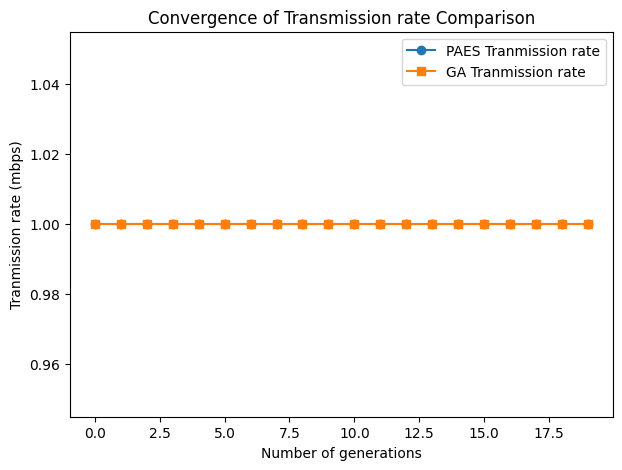

In [ ]:
# Plot the convergence of the transmission rate over the last run
plot_transmission_rate_convergence(pa_best_transmission_rates, ga_best_transmission_rates)

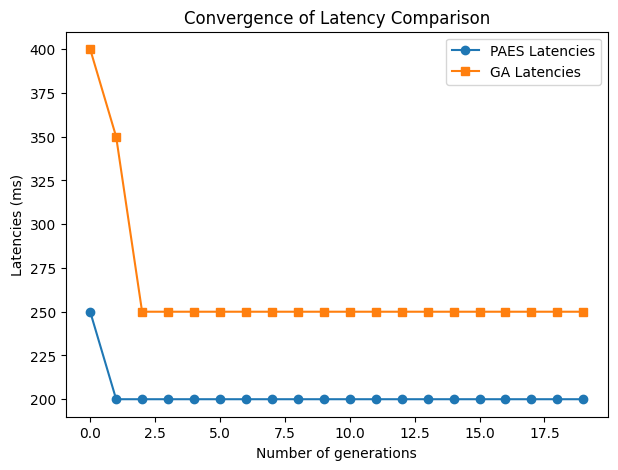

In [ ]:
# Plot the convergence of the latency over the last run
plot_latencies_convergence(pa_best_latencies, ga_best_latencies)

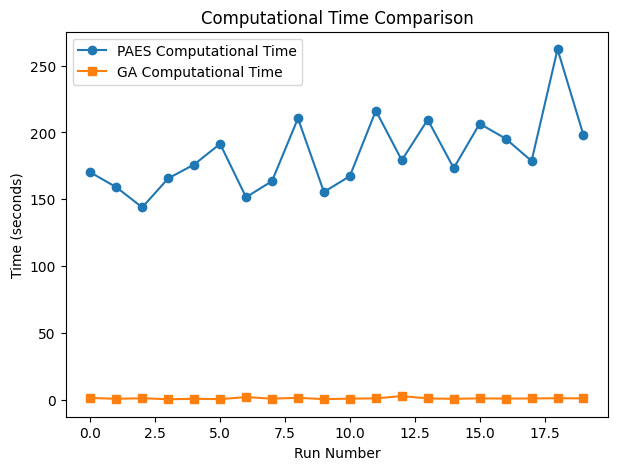

In [ ]:
# Plot the computational times over 20 runs
plot_computational_times(pa_times, ga_times)

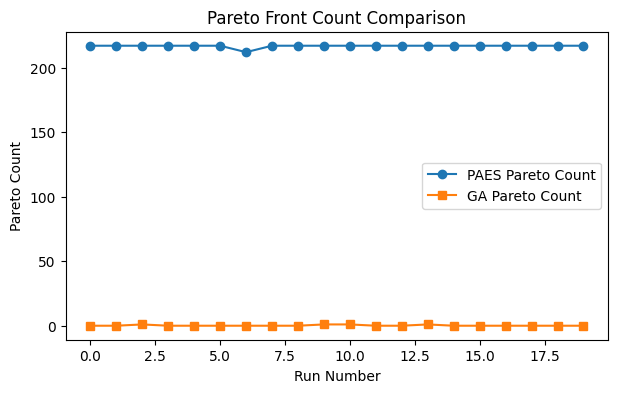

In [ ]:
# Plot the number of non dominated solutions produced over 20 runs
plot_pareto_counts(pa_pareto_counts, ga_pareto_counts)

Plot of Pareto front for the last run of both algorithm

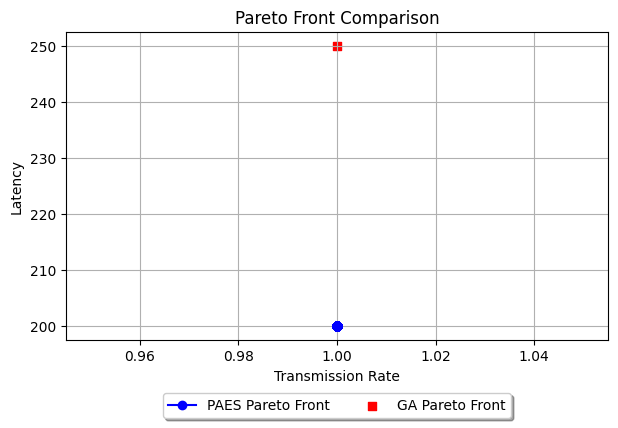

In [ ]:
# Plot of Pareto front for the last run of both algorithm
def plot_pareto_fronts(pa_fitnesses, ga_fitnesses):
    # Extract transmission rate and latency from fitnesses for PAES
    pa_transmission_rates = [fitness['transmission_rate'] for fitness in pa_fitnesses]
    pa_latencies = [fitness['latency'] for fitness in pa_fitnesses]

    # Extract transmission rate and latency from fitnesses for GA
    ga_transmission_rates = [fitness['transmission_rate'] for fitness in ga_fitnesses]
    ga_latencies = [fitness['latency'] for fitness in ga_fitnesses]

    plt.figure(figsize=(7, 4))

    # Plot PAES Pareto front with a line if more than one point
    if len(pa_transmission_rates) > 1:
        plt.plot(pa_transmission_rates, pa_latencies, 'o-', color='blue', label='PAES Pareto Front')
    else:
        plt.scatter(pa_transmission_rates, pa_latencies, c='blue', marker='o', label='PAES Pareto Front')

    # Plot GA Pareto front with a line if more than one point
    if len(ga_transmission_rates) > 1:
        plt.plot(ga_transmission_rates, ga_latencies, 's-', color='red', label='GA Pareto Front')
    else:
        plt.scatter(ga_transmission_rates, ga_latencies, c='red', marker='s', label='GA Pareto Front')

    plt.title('Pareto Front Comparison')
    plt.xlabel('Transmission Rate')
    plt.ylabel('Latency')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    plt.grid(True)
    plt.show()

# Call the function with the fitnesses from the last run
plot_pareto_fronts(pa_fitnesses, ga_fitnesses)

### Discussion of Results

**Convergence**  

In the convergence plots for the transmission rate, both algorithms converged at nearly the same time.  

However, in the latency convergence plots, PAES demonstrated better performance, converging to a lower latency value than NSGA-II. NSGA-II did not reach the same level of convergence as PAES. This difference may indicate the effectiveness of the **reduce latency mutation** developed and used as one of the mutations in PAES.

---


**Number of Non-Dominated Solutions**  

From the plot of the number of non-dominated solutions, it is evident that the PAES algorithm generally produces more non-dominated solutions compared to NSGA-II. In some instances, the difference between the two algorithms is significantly high.  

This disparity is even more pronounced when examining the JSON output files for both algorithms. For instance, in the PAES JSON file, Car-28 identified over 500 non-dominated solutions and exhibited similar results for other nodes. Conversely, in the NSGA-II JSON file, the number of non-dominated solutions for any node never exceeded 10.  

The substantial difference in the number of non-dominated solutions may be attributed to:  
1. The modification made to the PAES algorithm, allowing it to retain as many non-dominated solutions as possible.  
2. The two novel mutation methods introduced, particularly the **reduce latency mutation** and **modified swap mutation**.  

Further experimentation is necessary to determine the precise factors enabling PAES to discover a significantly higher number of non-dominated solutions compared to NSGA-II.  

---


**Computational Time**

From the compuation time plot, we can see that generally the PAES took more time to complete each run when compared against the NSGA-II algorithm, and also in some rare instances the time it took for the PAES was extremely long when compared to the NSGA-II, this coincides with times where the PAES found extremely high number of non dominated solution as compared with the other NSGA-II

---


**Computational Complexity**  

The implementation of both algorithms reveals that the modified PAES algorithm developed has a simpler implementation compared to NSGA-II. NSGA-II requires more complex operations, such as crowding distance calculation, crossover, and selection, while PAES is comparatively more straightforward.  

---

### Lessons Learned and Future Reccommendation

**Lessons Learned**  

1. Different multi-objective evolutionary algorithms have varying strengths and weaknesses, with some better suited for specific types of problems. Understanding the nature of the problem is crucial for selecting the appropriate algorithm.  

2. NSGA-II emphasizes maintaining diversity across the Pareto front, while PAES focuses more on exploring local search.  

3. The performance of both NSGA-II and PAES is highly sensitive to parameters such as population size, mutation rate, and the number of generations. Fine-tuning these parameters is critical for achieving optimal results.  

4. PAES has a simpler implementation compared to NSGA-II, which requires more complex operations such as crowding distance calculation, crossover, and selection.  

5. NSGA-II provided a better spread of solutions, while PAES identified more solutions but with less diversity.  

---

**Future Recommendations**  

1. Test the Genetic Algorithm with both of the newly developed mutation methods. This will help determine whether the high number of non-dominated solutions identified by PAES is due to the algorithm itself or the new mutation methods.  

2. Test the PAES algorithm using only the inversion mutation method from the Genetic Algorithm. This will further clarify whether the performance of PAES is primarily driven by the algorithm or the new mutation methods. Additionally, it will help identify whether the high computational time is due to the two new mutation methods.  

3. Replace the **`Network_link_lists`** list with an array. Arrays in Python are typically faster than lists because they store data more compactly, perform operations using low-level optimizations, and avoid type-checking overhead. Using arrays may reduce computational time and improve memory efficiency for both algorithms.  

4. Implement and evaluate other methods, such as Multi-Objective Particle Swarm Optimization (MOPSO), to compare performance with NSGA-II and PAES. This comparison will help assess whether the observed results are reflective of the algorithms' capabilities or if alternative methods perform better.  

---


### Achievement of Project Objectives


So far we have been able to achieve the project objectives we set out to achieve. We started with reviewing several methods that could be used to solve the multi objective problem, then we settled for two methods which are Genetic Algorithm and PAES, and we gave justification for choosing thes two methods. Next we implemented these two methods and collected all routes possible for each of the nodes using these two algorithms. We then proceeded to evaluate the algorithms and our evaluation made us discover that the PEAS algorithm actually produced more non dominated solutions compared to the Genetic Algorithm, although it took more time compared to the time it took for the Genetic Algorithm to run. Lastly we gave future reccomendations on how to proceed with the experiment, one of which is to try and implement the three mutation methods into the genetic algorithms and then see how the genetic algorithm performs.


### Achievement of a good Understanding of Search and Optimisation methods

This project, which involved using NSGA-II and a modified PAES algorithm to address the network routing multi-objective optimization problem, provided valuable insights into optimization in real-world scenarios by:  

1. Effectively applying appropriate algorithms for solving complex network optimization problems.  
2. Deepening understanding of evolutionary algorithm mechanisms.  
3. Building expertise in benchmarking algorithm performance.  
4. Gaining practical experience in evaluating algorithm effectiveness.  
5. Enhancing critical analysis and interpretation of algorithmic performance.  

These outcomes contributed to a robust understanding of search and optimization benchmarking relevant to real-world applications.  

# References

Reference list

- Coello, C. A., Toscano-Pulido, G. and Lechuga, M. S., 2004. Handling multiple objectives with particle swarm optimization. IEEE Transactions on Evolutionary Computation [online], 8 (3), 256–279. Available from: https://ieeexplore.ieee.org/abstract/document/1304847?casa_token=RVlpfZAPkGkAAAAA:MGtknyVaMRJPuf3J7CYpwkGYcUKswasORuUiNDv7uY8EXrtNqdboq39-WJchaaATX2UT5nnGKQ [Accessed 15 Nov 2023].

- Deb, K., 2011. Multi-objective Optimisation Using Evolutionary Algorithms: An Introduction. Springer eBooks [online], 3–34. Available from: https://link.springer.com/chapter/10.1007/978-0-85729-652-8_1 [Accessed 1 Oct 2023].

- Deb, K., Pratap, A., Agarwal, S. and T. Meyarivan, 2002. A fast and elitist multiobjective genetic algorithm: NSGA-II. IEEE Transactions on Evolutionary Computation [online], 6 (2), 182–197. Available from: https://ieeexplore.ieee.org/abstract/document/996017?casa_token=xhb3Gc732OoAAAAA:O6v_-GcvInFKP6PcNGhGZ0-VlJdRcPlx_BIarg8OJCaOTD7ZgU6n3xZMPQUCSnlnotaoMQ19Fg [Accessed 11 Nov 2023].

- Eckart Zitzler, Deb, K. and Thiele, L., 2000. Comparison of Multiobjective Evolutionary Algorithms: Empirical Results. Evolutionary Computation [online], 8 (2), 173–195. Available from: https://ieeexplore.ieee.org/abstract/document/6787994 [Accessed 25 Sep 2023].

- Gunantara, N. and Ai , Q., 2018. A review of multi-objective optimization: Methods and its applications. Cogent Engineering [online]. Available from: https://www.tandfonline.com/doi/full/10.1080/23311916.2018.1502242 [Accessed 11 Nov 2023].

- Knowles, J. and Corne, D., 2003a. The Pareto archived evolution strategy: a new baseline algorithm for Pareto multiobjective optimisation. Available from: https://ieeexplore.ieee.org/document/781913 [Accessed 17 Dec 2023].

- Knowles, J. and Corne, D., 2003b. The Pareto archived evolution strategy: a new baseline algorithm for Pareto multiobjective optimisation. Available from: https://ieeexplore.ieee.org/abstract/document/781913 [Accessed 28 Nov 2023].

- Lee, S., Sang-Moon Soak, Seung Jong Oh, Witold Pedrycz and Jeon, M., 2008. Modified binary particle swarm optimization. Progress in Natural Science: Materials International [online], 18 (9), 1161–1166. Available from: https://www.sciencedirect.com/science/article/pii/S1002007108002189 [Accessed 17 Dec 2023].

- Mojtaba Ahmadieh Khanesar, Teshnehlab, M. and Mahdi Aliyari Shoorehdeli, 2007. A novel binary particle swarm optimization. Available from: https://ieeexplore.ieee.org/document/4433821 [Accessed 17 Dec 2023].

- Oltean, M., Crina Groşan, Abraham, A. and Köppen, M., 2005. Multiobjective optimization using adaptive Pareto archived evolution strategy. Available from: https://ieeexplore.ieee.org/abstract/document/1578843?casa_token=Rj8_L61JiIgAAAAA:wOhns2KVx7s-HrhpTXsdF6g5XncxQPbbQtncs4XB0z91pmbqbu65ovGD6pTAweDFFTVPgAXaiw [Accessed 1 Dec 2023].

- Puljić, K. and Manger, R., 2013. Comparison of eight evolutionary crossover operators for the vehicle routing problem. Mathematical Communications [online], 18 (2), 359–375. Available from: https://hrcak.srce.hr/110829 [Accessed 4 Oct 2023].

- Seshadri, A., 2006. A fast elitist multiobjective genetic algorithm: NSGA-II.

- MATLAB Central.Xiujuan, L. and Zhongke, S., 2004. Overview of multi-objective optimization methods [online]. Ieee.org. Available from: https://ieeexplore.ieee.org/abstract/document/6077796 [Accessed 15 Nov 2023].